# Project Wine Reviews

In [1]:
# Step 1: Data Wrangling

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline

pd.options.display.max_seq_items = 500
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [3]:
# importing data
wine = pd.read_csv('winemag-data_first150k.csv')

In [4]:
wine = wine.dropna(subset=['price'])

In [5]:
wine['points_bins'] = pd.qcut(wine['points'], q=5, 
                              labels=['very low','low', 'medium', 'high', 'very high'])

In [6]:
wine_price_cap = wine[wine.price < 200] 
print(len(wine_price_cap))

136368


In [7]:
wine_price_cap.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_bins
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,very high


In [8]:
#wine_grouped = wine.groupby(['country'])
print(wine_price_cap.country.value_counts()[:10])

US             62021
Italy          18641
France         14375
Spain           8102
Chile           5753
Argentina       5580
Australia       4855
Portugal        4156
New Zealand     3070
Austria         2480
Name: country, dtype: int64


In [9]:
wine_country_cap = wine_price_cap[
    wine_price_cap.country.isin(wine_price_cap.country.value_counts()[:12].index)]
wine_country_cap.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_bins
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,very high


## Step 2: Decision Trees - Regression

In [10]:
# import Sklean modules
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [11]:
# convert country column into dummy varables
wine_country_dummy = pd.get_dummies(wine_country_cap['country'])
wine_country_cap_dummy = pd.concat([wine_country_cap, wine_country_dummy], axis=1)
wine_country_cap_dummy.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,points_bins,Argentina,Australia,Austria,Chile,France,Germany,Italy,New Zealand,Portugal,South Africa,Spain,US
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,very high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
train, validate, test = np.split(wine_country_cap_dummy.sample(frac=1),
                                 [int(0.7 * len(wine_country_cap_dummy)), 
                                  int(0.85 * len(wine_country_cap_dummy))])
print('Number of Observations in Trainig Set:    ', len(train), '  (70%)',
      '\nNumber of Observations in Validation Set: ', len(validate),'  (15%)',
      '\nNumber of Observations in Test Set:       ', len(test),'  (15%)')

Number of Observations in Trainig Set:     93494   (70%) 
Number of Observations in Validation Set:  20035   (15%) 
Number of Observations in Test Set:        20035   (15%)


In [13]:
X_train = train[['price','Argentina','Australia','Austria','Chile',
                            'France','Germany','Italy','New Zealand','Portugal',
                            'South Africa','Spain','US']]
X_train = np.array(X_train)
y_train = train['points']
y_train = np.array(y_train)

In [14]:
X_validate = validate[['price','Argentina','Australia','Austria','Chile',
                            'France','Germany','Italy','New Zealand','Portugal',
                            'South Africa','Spain','US']]
X_validate = np.array(X_validate)
y_validate = validate['points']
y_validate = np.array(y_validate)

In [15]:
X_test = test[['price','Argentina','Australia','Austria','Chile',
                            'France','Germany','Italy','New Zealand','Portugal',
                            'South Africa','Spain','US']]
X_test = np.array(X_test)
y_test = test['points']
y_test = np.array(y_test)

In [16]:
def DT_test(inputs, X_train, X_test, y_train, y_test):
    '''
    function to analyse different parameters for Regression
    outputs a matrix with various validation metrics
    '''
    mae_train = []
    mae_test = []
    mse_train = []
    mse_test = []
    rsq_train = []
    rsq_test = []
    
    for i in inputs:
        model = DecisionTreeRegressor(min_samples_leaf=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        y_training_pred = model.predict(X_train)
        
        mae_train.append(mean_absolute_error(y_training_pred, y_train))
        mae_test.append(mean_absolute_error(y_pred, y_test))
        mse_train.append(mean_squared_error(y_training_pred, y_train))
        mse_test.append(mean_squared_error(y_pred, y_test))
        rsq_train.append(model.score(X_train, y_train))
        rsq_test.append(model.score(X_test, y_test))
        print('Calculating model {0} of {1}'.format(i,len(inputs)))
        
    test_matrix = pd.DataFrame(
        {'MAE over training set': mae_train,
        'MAE over validation set': mae_test,
        'MSE over training set': mse_train,
        'MSE over validation set': mse_test,
        'R^2 over training set': rsq_train,
        'R^2 over validation set': rsq_test},index=inputs)
    
    return test_matrix

In [17]:
DT_test([1,5,10,50,100,1000], X_train=X_train, X_test=X_validate, y_train=y_train, y_test=y_validate)

Calculating model 1 of 6
Calculating model 5 of 6
Calculating model 10 of 6
Calculating model 50 of 6
Calculating model 100 of 6
Calculating model 1000 of 6


,MAE over training set,MAE over validation set,MSE over training set,MSE over validation set,R^2 over training set,R^2 over validation set
1,1.954695,1.969307,6.123033,6.202236,0.396854,0.388398
5,1.962926,1.971407,6.148657,6.198547,0.394330,0.388762
10,1.965983,1.971604,6.164732,6.195373,0.392746,0.389074
50,1.973429,1.973603,6.210521,6.208242,0.388236,0.387805
100,1.977198,1.973369,6.231379,6.201538,0.386181,0.388467
1000,1.995523,1.985789,6.365480,6.303666,0.372972,0.378396


In [18]:
# build model - fit - predict optimal model based on DT_validation output
model = DecisionTreeRegressor(min_samples_leaf=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_validate)
y_pred_test = model.predict(X_test)

In [19]:
# MAE evaluation
y_training_pred = model.predict(X_train)
print('MAE over training set:    ', mean_absolute_error(y_training_pred, y_train))
print('MAE over validation set:    ', mean_absolute_error(y_pred, y_validate))
print('----------------------------')
# MSE evaluation
print('MSE over training set:    ', mean_squared_error(y_training_pred, y_train))
print('MSE over vaildation set:    ', mean_squared_error(y_pred, y_validate))
print('----------------------------')
# R squared evaluation
print('R^2 over training set:    ', model.score(X_train, y_train))
print('R^2 over validation set:    ', model.score(X_validate, y_validate))

MAE over training set:     1.95469498214
MAE over validation set:     1.9693508741
----------------------------
MSE over training set:     6.12303303007
MSE over vaildation set:     6.20334910741
----------------------------
R^2 over training set:     0.396853763168
R^2 over validation set:     0.388287966379


In [20]:
# Top 10 features
top_tree_weights = sorted(zip(model.feature_importances_, ['price','Argentina','Australia','Austria','Chile',
                                        'France','Germany','Italy','New Zealand','Portugal',
                                        'South Africa','Spain','US']),reverse=True)
top_tree_weights

[(0.9384037943486625, 'price'),
 (0.021327092814865556, 'US'),
 (0.010383023272930633, 'Portugal'),
 (0.0064010054443208227, 'Spain'),
 (0.0059497552197459403, 'Argentina'),
 (0.0045294096717989601, 'Austria'),
 (0.0029338498863713037, 'Italy'),
 (0.0023828387154666559, 'Chile'),
 (0.0023762935238678942, 'Germany'),
 (0.0017041909301486091, 'Australia'),
 (0.0014033503192600986, 'France'),
 (0.0011630227836575287, 'New Zealand'),
 (0.0010423730689033146, 'South Africa')]

In [21]:
df1 = []
df2 = []
for i,j in top_tree_weights:
    df1.append(i)
    df2.append(j)
top_tree = pd.DataFrame({'Feature':df2,'Importance':df1})
#print(top_features)

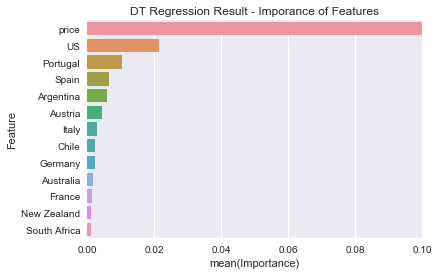

In [22]:
sns.barplot(y='Feature',
            x='Importance',
            data=top_tree)
sns.plt.xlim(0,0.1)
sns.plt.title('DT Regression Result - Imporance of Features')
sns.plt.savefig('tree_weight.png')

# Step 3: Linear SVR Regression

### Count Vectorizer

In [23]:
from sklearn.svm import LinearSVR

In [24]:
# Step 1: Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=20)
X_train = count_vectorizer.fit_transform(train['description'])
X_validate = count_vectorizer.transform(validate['description'])
X_test = count_vectorizer.transform(test['description'])

In [26]:
print(X_train.shape)
print(type(X_train))

(93494, 5496)
<class 'scipy.sparse.csr.csr_matrix'>


In [27]:
def SVR_test(inputs, X_train, X_test, y_train, y_test):
    '''
    function to analyse different parameters for Regression
    outputs a matrix with various validation metrics
    '''
    mae_train = []
    mae_test = []
    mse_train = []
    mse_test = []
    rsq_train = []
    rsq_test = []
    
    for i in inputs:
        model = LinearSVR(C=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        y_training_pred = model.predict(X_train)
        
        mae_train.append(mean_absolute_error(y_training_pred, y_train))
        mae_test.append(mean_absolute_error(y_pred, y_test))
        mse_train.append(mean_squared_error(y_training_pred, y_train))
        mse_test.append(mean_squared_error(y_pred, y_test))
        rsq_train.append(model.score(X_train, y_train))
        rsq_test.append(model.score(X_test, y_test))
        print('Calculating model {0} of {1}'.format(i,len(inputs)))
        
    test_matrix = pd.DataFrame(
        {'MAE over training set': mae_train,
        'MAE over validation set': mae_test,
        'MSE over training set': mse_train,
        'MSE over validation set': mse_test,
        'R^2 over training set': rsq_train,
        'R^2 over validation set': rsq_test},index=inputs)
    
    return test_matrix

In [28]:
SVR_test([0.001,0.01,0.1,1,10,100,1000], X_train=X_train, X_test=X_validate, y_train=y_train, y_test=y_validate)

Calculating model 0.001 of 7
Calculating model 0.01 of 7
Calculating model 0.1 of 7
Calculating model 1 of 7
Calculating model 10 of 7
Calculating model 100 of 7
Calculating model 1000 of 7


,MAE over training set,MAE over validation set,MSE over training set,MSE over validation set,R^2 over training set,R^2 over validation set
0.001,10.127055,10.134930,155.480293,155.411283,-14.315507,-14.325101
0.010,1.501081,1.535561,3.873540,3.954619,0.618439,0.610035
0.100,1.241013,1.327320,2.723410,2.962022,0.731732,0.707915
1.000,1.222164,1.339239,2.702766,3.034663,0.733765,0.700752
10.000,1.231904,1.351037,2.734945,3.083486,0.730596,0.695938
100.000,1.537736,1.601662,3.902558,4.177722,0.615580,0.588035
1000.000,1.834477,1.895666,5.342446,5.681580,0.473745,0.439740


In [29]:
# build model - fit - predict with optimal sample parameter
model = LinearSVR(C=0.1)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_validate)
y_pred_test2 = model.predict(X_test)

In [30]:
print(model.score(X_train, y_train))
print(model.get_params)

0.731723876047
<bound method BaseEstimator.get_params of LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)>


In [31]:
# MAE evaluation
y_training_pred = model.predict(X_train)
print('MAE over training set:    ', mean_absolute_error(y_training_pred, y_train))
print('MAE over validate set:    ', mean_absolute_error(y_pred2, y_validate))
print('----------------------------')
# MSE evaluation
print('MSE over training set:    ', mean_squared_error(y_training_pred, y_train))
print('MSE over vaildate set:    ', mean_squared_error(y_pred2, y_validate))
print('----------------------------')
# R squared evaluation
print('R^2 over training set:    ', model.score(X_train, y_train))
print('R^2 over validate set:    ', model.score(X_validate, y_validate))

MAE over training set:     1.2410055224
MAE over validate set:     1.3272567392
----------------------------
MSE over training set:     2.72349136549
MSE over vaildate set:     2.96190613612
----------------------------
R^2 over training set:     0.731723876047
R^2 over validate set:     0.707926541849


In [32]:
top_feature_names = sorted(zip(model.coef_, count_vectorizer.get_feature_names()),reverse=True)[:20]

In [33]:
df1 = []
df2 = []
for i,j in top_feature_names:
    df1.append(i)
    df2.append(j)
top_features = pd.DataFrame({'Keyword':df2,'Importance':df1})
#print(top_features)

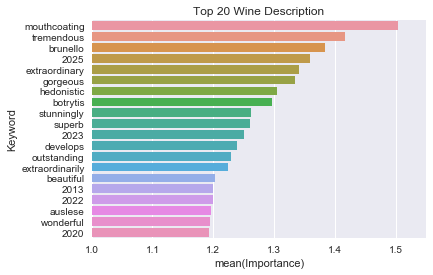

In [34]:
sns.barplot(y='Keyword',
            x='Importance',
            data=top_features)
sns.plt.xlim(1,1.55)
sns.plt.title('Top 20 Wine Description')
sns.plt.savefig('description_count.png')

# Step 4: Combining Models

In [35]:
from sklearn.metrics import r2_score

In [36]:
def r2_max():
    r2 = []
    for w in np.arange(0,1,0.1):
        y_combined = (1-w) * y_pred + w * y_pred2
        score = r2_score(y_validate, y_combined)
        r2.append((w,score))
    return max(r2, key=lambda pair:pair[1])

In [37]:
w = r2_max()[0]

In [38]:
y_combined = (1-w) * y_pred + w * y_pred2

In [39]:
# MAE evaluation
print('MAE over validate set:    ', mean_absolute_error(y_combined, y_validate))

MAE over validate set:     1.28614508799


In [40]:
r2_score(y_validate, y_combined)

0.73277917267791826

# Step 5: Predictions over Test Set 

In [41]:
y_combined = (1-w) * y_pred_test + w * y_pred_test2
# MAE evaluation
print('MAE over test set:    ', mean_absolute_error(y_combined, y_test))
print('MSE over test set:    ', mean_squared_error(y_combined, y_test))
print('R^2 over test set:    ', r2_score(y_test, y_combined))

MAE over test set:     1.28846104576
MSE over test set:     2.70599777424
R^2 over test set:     0.732924486535


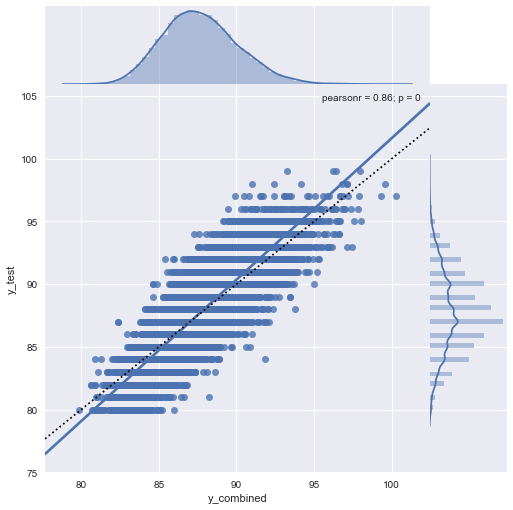

In [42]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(y_combined, y_test, kind="reg", size=7, space=0)

x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')

plt.xlabel('y_combined')
plt.ylabel('y_test')